In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# lets load a netcdf file into xarray as a dataset and take a look at it

ds=xr.open_dataset('../data/air.2m.mon.mean.nc')

ds

<xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 539, nbnds: 2)
Coordinates:
  * level      (level) float32 2.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-11-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    air        (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [3]:
# the individual variables can be looked at one at a time in xarray
ds.air

<xarray.DataArray 'air' (time: 539, level: 1, lat: 94, lon: 192)>
[9727872 values with dtype=float32]
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-11-01
Attributes: (12/14)
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

In [4]:
# the xarray variable can also be used as a numpy variable using ds.x.data
# NOTE THAT XARRAY VARIABLES AND NUMPY ARRAYS ARE NOT INTERCHANGABLE
# e.g. just because you can do something with ds.x.data doesn't mean that it will work with ds.x and vice versa.
# this is true of selecting and slicing data

ds.air.data

array([[[[239.67   , 239.64   , 239.62   , ..., 239.77   , 239.74   ,
          239.7    ],
         [241.2    , 241.11   , 241.01   , ..., 241.44   , 241.37   ,
          241.29   ],
         [242.41   , 242.37   , 242.34   , ..., 242.48   , 242.45999,
          242.43   ],
         ...,
         [250.49   , 250.04   , 249.65   , ..., 252.01   , 251.48   ,
          250.97   ],
         [249.52   , 249.3    , 249.08   , ..., 250.20999, 249.95999,
          249.76   ],
         [246.65   , 246.53   , 246.43   , ..., 246.92   , 246.83   ,
          246.74   ]]],


       [[[237.1    , 237.1    , 237.12   , ..., 237.08   , 237.1    ,
          237.1    ],
         [237.47   , 237.45999, 237.45   , ..., 237.45   , 237.45999,
          237.45999],
         [237.73   , 237.77   , 237.73   , ..., 237.44   , 237.52   ,
          237.63   ],
         ...,
         [239.81   , 239.35   , 238.89   , ..., 241.31   , 240.81   ,
          240.29   ],
         [238.70999, 238.42   , 238.13   , ..., 

In [5]:
# lets get the first time slice three different ways

# note that the first two are xarray data arrays, and the last one is a numpy array.

print( ds.air.sel(time=ds.time.data[0]) )

print( ds.air.isel(time=0) )

print(ds.air.data[0])

<xarray.DataArray 'air' (level: 1, lat: 94, lon: 192)>
array([[[239.67   , 239.64   , ..., 239.74   , 239.7    ],
        [241.2    , 241.11   , ..., 241.37   , 241.29   ],
        ...,
        [249.52   , 249.3    , ..., 249.95999, 249.76   ],
        [246.65   , 246.53   , ..., 246.83   , 246.74   ]]], dtype=float32)
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    time     datetime64[ns] 1979-01-01
Attributes: (12/14)
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:

Text(0, 0.5, 'lat')

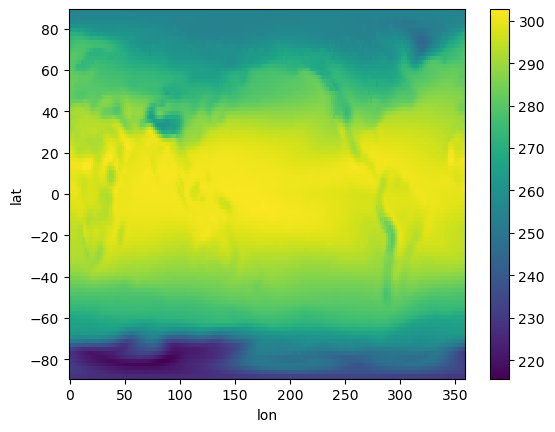

In [6]:
# lets take the first year of data and make a mean and then plot it 

# the mean on its own still has an axis for time even after taking the mean
# use squeeze to get rid of this.
tmean = ds.air.isel(time=slice(0,12)).mean(dim='time').squeeze()
lon = ds.lon
lat = ds.lat

plt.pcolor(lon,lat,tmean)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')

In [7]:
# make some weights to calculate the global average 
# these are "solid angle elements": d(lon in rads)*d( lat in rads )*cos(lat in rads) 

# get the lon and lat data
lon = ds.lon.data
lat = ds.lat.data

# convert these to radians
rx = lon*np.pi/180.
ry = lat*np.pi/180.

# since the grid is constant in lon so can use a single rad element 
drx = rx[1]-rx[0]

# this is a little trick
# since the grid isn't evenly spaced on lat, going to find the latitudes at the points halfway between the grid points.
# then calculate dry at at the grid points by using the differences at the half points  
ryh = np.hstack([np.pi/2,.5*(ry[1:]+ry[:-1]),-np.pi/2])
dry = ryh[:-1]-ryh[1:]
cosy = np.cos(ry)

# this is the area element, but look at the shape:
dA = cosy*dry*drx
print('shape of dA:',dA.shape)

# dA is a 1d array, so we can broadcast it to 2d using np.meshgrid 
# we don't need the lon values, so just redirect those to null output
__,dA2 = np.meshgrid(lon,dA)

#get the solide angle elements by multiplying the two together
#dA = drad*dsin2

# check to make sure that our solid angle elements sum to 4pi 
print('check sum area elements:', dA2.sum()/(4*np.pi))


shape of dA: (94,)
check sum area elements: 1.0002316823634434


(539,)


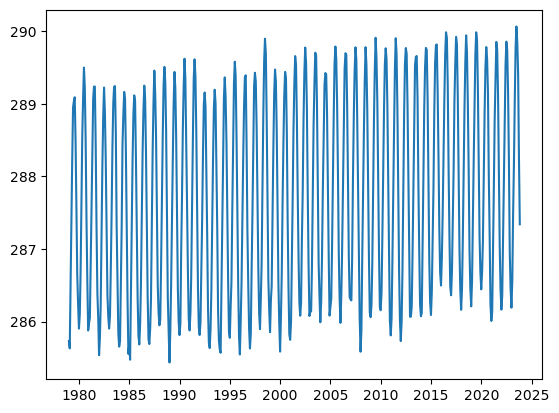

In [8]:
# now we can calculate the global average temperature

# here use np.newaxis to broadcast the solid angle elements over the time axis as well 

T_globalmean = ( ( ds.air.data * dA2[np.newaxis,:,:] ).sum(axis=(-1,-2)) / dA2.sum() ).squeeze()

print(T_globalmean.shape)

plt.plot(ds.time,T_globalmean)

In [9]:
# lets get some data from from a different dataset and compare this to what we have.
# unfortunately that data is in a CSV file so we have to load using pandas

df = pd.read_csv('../data/global/1850-2022.csv')

# the resulting object is a pandas dataframe, kind of similar to an excel spreadsheet but in python
print(df)


     Year  Anomaly
0    1850    -0.16
1    1851    -0.08
2    1852    -0.09
3    1853    -0.10
4    1854    -0.09
..    ...      ...
168  2018     0.86
169  2019     0.98
170  2020     1.01
171  2021     0.86
172  2022     0.91

[173 rows x 2 columns]


In [10]:
# we can get data out a pandas data frame using the values attribute

T_analysis = df.Anomaly.values

print(T_analysis.shape)

(173,)


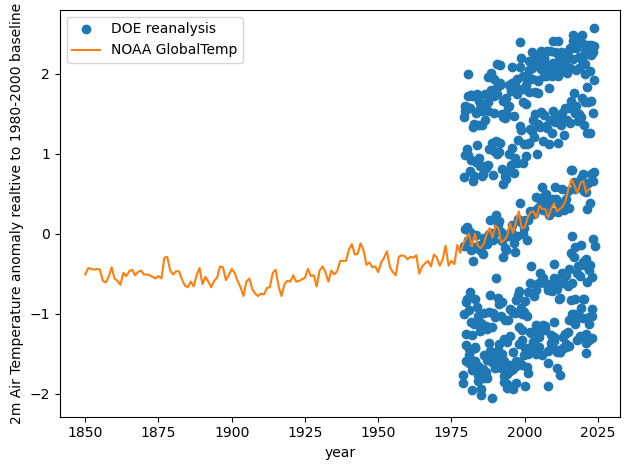

In [15]:
# lets try and plot the two of them together. 
# because the NOAA GlobalTemp data is as an anomaly, we need to subtract a base state from both of them. 
# lets use 1980-2000 as our base state

Tanom1 = T_globalmean - T_globalmean[1:20*12+2].mean()
Tanom2 = T_analysis - T_analysis[130:151].mean()

# make a time array for the reanalsyis data using decimal years to match the analysis data
t0=np.arange(1979,2024-1/12-0.001,1/12)

plt.plot(t0,Tanom1,'o',label='DOE reanalysis')
plt.plot(df.Year,Tanom2,label='NOAA GlobalTemp')

plt.ylabel('2m Air Temperature anomaly realtive to 1980-2000 baseline')
plt.xlabel('year')

plt.legend()

plt.tight_layout()